In [1]:
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt

In [469]:
def m_n(Sn, S0, m0, var, X, y):
    return Sn * ( S0.I * m0 + var * X.T * y )

In [470]:
def s_n(S0, var, X):
    return ( S0.I + var * X.T * X ).I

In [450]:
# Testing if functions m_n and s_n gives same values as in Q3  

mu_1 = 1
mu_2 = -1
pre_1 = 1
pre_2 = 4
pre_t = 5
t = 3

m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[pre_1, 0], [0, pre_2]] )

X = np.array([[1, -1]])

Sn = s_n(S0, pre_t, X)

mn = m_n(Sn, S0, m0, pre_t, X, t)

print(Sn)
print(mn)


[[0.9 0.4]
 [0.4 2.4]]
[[ 1.1]
 [-1.4]]


# Q4

In [252]:
#hyperparameters
mu_1 = 0
mu_2 = 0
pre_1 = 1
pre_2 = 1
pre_t = 1

In [253]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 10#mu_1
s2_0 = -10#mu_2

In [254]:
#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(mu_1 - mu_2)/np.sqrt(pre_t), b=np.inf, loc=(mu_1 - mu_2), scale=np.sqrt(pre_t))

In [255]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[pre_1, 0], [0, pre_2]] )
X = np.array([[1, -1]])

Sn = s_n(S0, pre_t, X)


for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(pre_t), b=np.inf, loc=mu_t, scale=np.sqrt(pre_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, pre_t, X, T[i])
    S1[i] = np.random.normal(mn[0],Sn[0, 0])
    S2[i] = np.random.normal(mn[1],Sn[1, 1])
    
    
    

In [256]:
#Gibbs sample for p(t>0) and generate s1 & s2 for the drawn t
#for i in range(0, L):
#    # p(t_k | y = 1)
#    T[i] = truncnorm.rvs(a=0, b=np.inf, loc=0, scale=np.sqrt(pre_t))
#    
#    #p(s1_k, s2_k | t_k, y = 1)
#    mn = m_n(Sn, S0, m0, pre_t, X, T[i])
#    S1[i] = np.random.normal(mn[0],Sn[0, 0])
#    S2[i] = np.random.normal(mn[1],Sn[1, 1])
    

(array([4.39448756e-01, 3.28327625e-01, 1.97063422e-01, 9.70833704e-02,
        3.70106675e-02, 1.15421588e-02, 3.07493806e-03, 4.67925357e-04,
        4.45643197e-05, 2.22821598e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.22821598e-05]),
 array([8.48950951e-05, 8.97663951e-01, 1.79524301e+00, 2.69282206e+00,
        3.59040112e+00, 4.48798018e+00, 5.38555923e+00, 6.28313829e+00,
        7.18071735e+00, 8.07829640e+00, 8.97587546e+00, 9.87345451e+00,
        1.07710336e+01, 1.16686126e+01, 1.25661917e+01, 1.34637707e+01,
        1.43613498e+01, 1.52589289e+01, 1.61565079e+01, 1.70540870e+01,
        1.79516660e+01]),
 <a list of 20 Patch objects>)

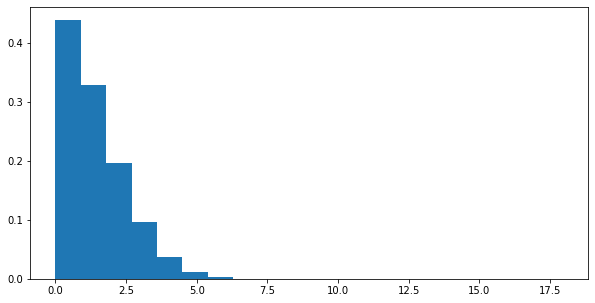

In [257]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(T, density=True, bins=20)

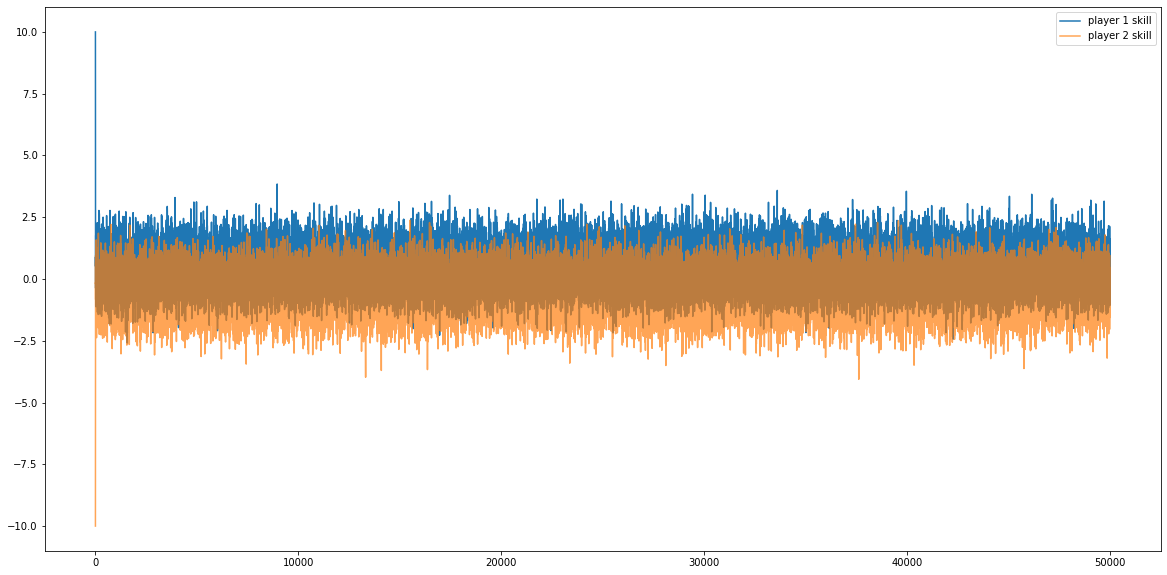

In [258]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

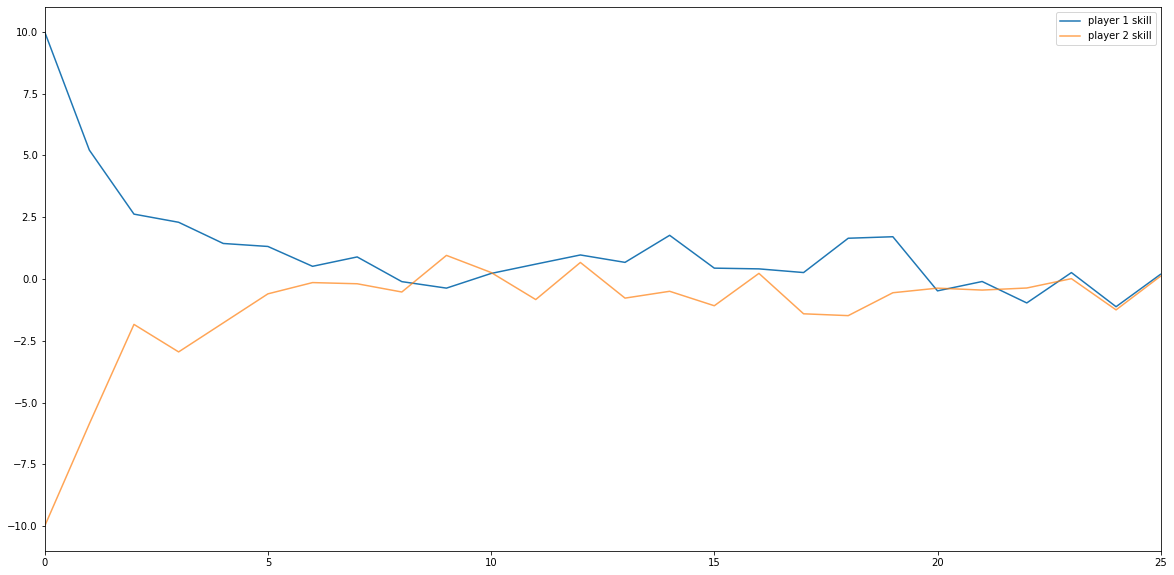

In [259]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 25)
plt.show()

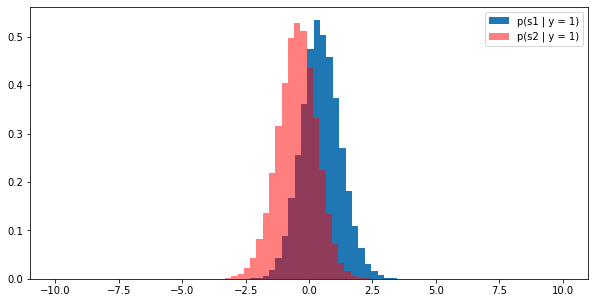

In [260]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [261]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.47157353305493166
est mean S2: -0.47258513729172397
est var S1: 0.5798101430391304
est var S2: 0.5746391492156857


The initial values
<br>
s1_0 = 10 
<br>
s2_0 = -10
<br>
<br>
Generates a burn in period of about 5 iterations. A better choice of initial values is to choose the mean of the sampled data points for each player.
<br>
s1_0 = 0.47
<br>
s2_0 = -0.47

## Rerun with new params

In [262]:
#hyperparameters
mu_1 = 0
mu_2 = 0
pre_1 = 1
pre_2 = 1
pre_t = 1

In [263]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(1/pre_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(1/pre_t))

In [264]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[pre_1, 0], [0, pre_2]] )
X = np.array([[1, -1]])

Sn = s_n(S0, pre_t, X)


for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(1/pre_t), b=np.inf, loc=mu_t, scale=np.sqrt(1/pre_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, pre_t, X, T[i])
    S1[i] = np.random.normal(mn[0],Sn[0, 0])
    S2[i] = np.random.normal(mn[1],Sn[1, 1])
    
    
    

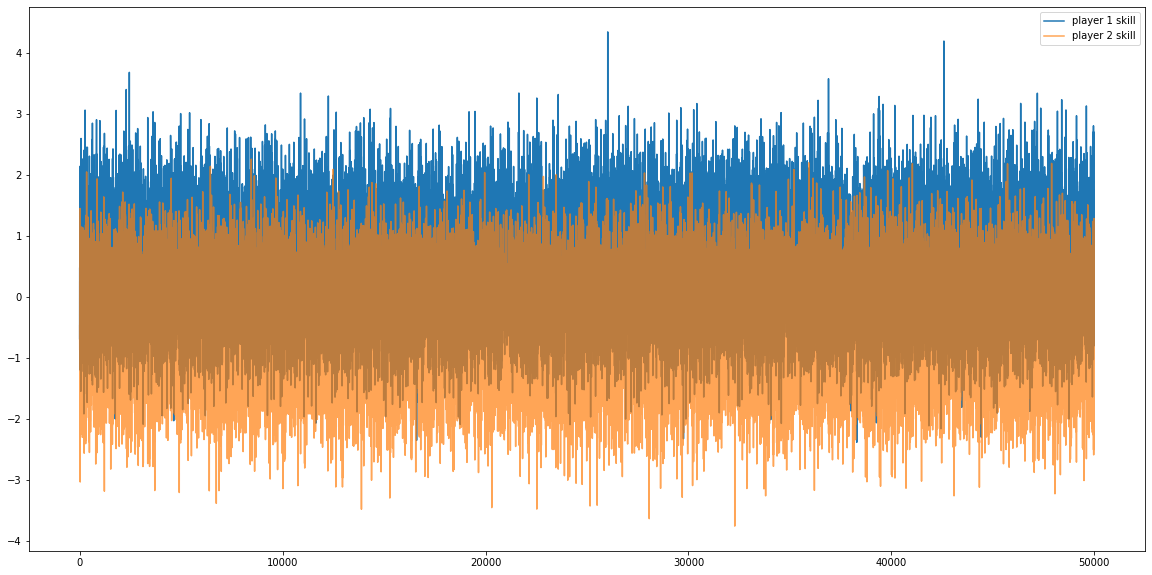

In [265]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

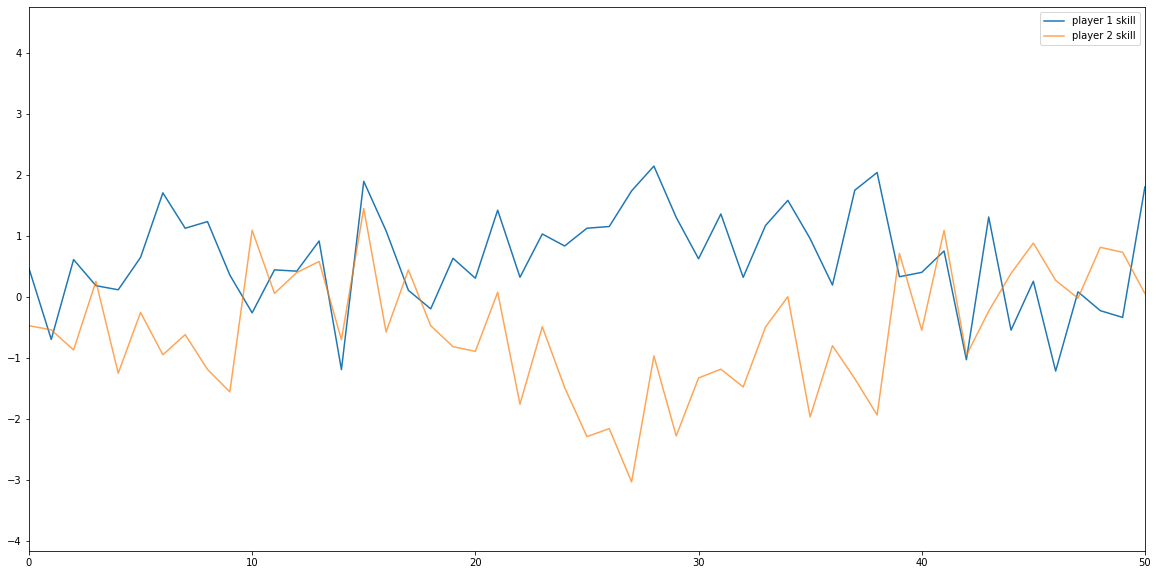

In [266]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 50)
plt.show()

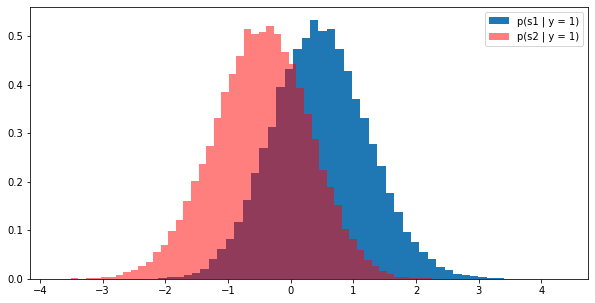

In [267]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [268]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.4768356689744224
est mean S2: -0.47126723456997127
est var S1: 0.5818835914348142
est var S2: 0.5797712027225176


In [403]:
def gauss_approx(data1, data2):
    S0 = np.cov(data1, data2)
    m0 = [np.mean(data1), np.mean(data2)]
    return m0, S0

In [270]:
def normal_pdf(x, mean, var):
    return ( 1 / np.sqrt(2 * np.pi * var) ) * np.exp( ( -1 / ( 2 * var ) ) * ( (x - mean) **2 ) )

In [271]:
est_mean, est_cov = gauss_approx(S1, S2)
print(est_mean)
print(est_cov)

[[ 0.47683567]
 [-0.47126723]]
[[ 0.58189523 -0.128001  ]
 [-0.128001    0.5797828 ]]


# Testing different sample sizes

In [232]:
#hyperparameters
mu_1 = 0
mu_2 = 0
pre_1 = 1
pre_2 = 1
pre_t = 1

In [272]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(1/pre_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(1/pre_t))

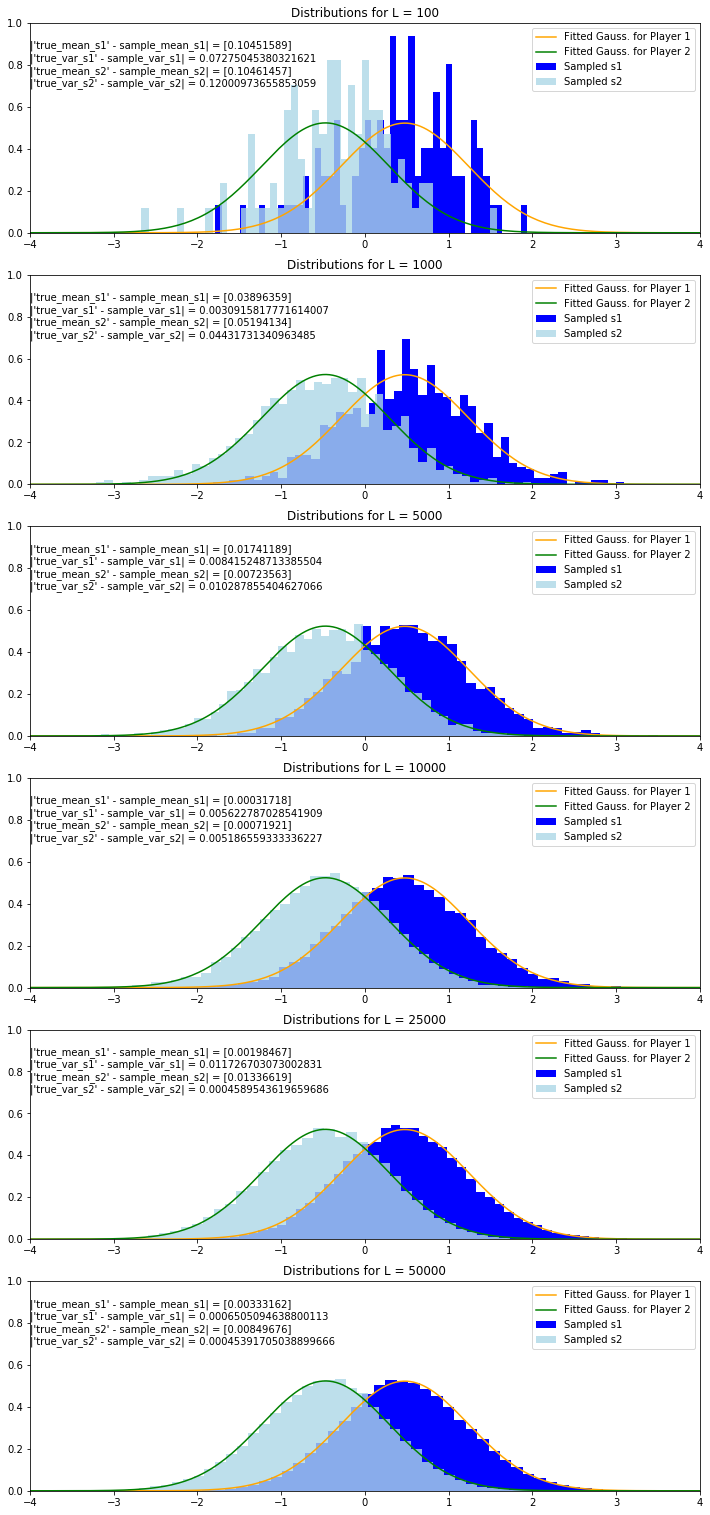

In [283]:
lengths = [100, 1000, 5000, 10000, 25000, 50000]
times = []

fig, axes = plt.subplots(len(lengths),1, figsize=(12,27))

for i, L in enumerate(lengths):
    start = time.time()
    T = np.zeros(L)
    S1 = np.zeros(L)
    S2 = np.zeros(L)

    T[0] = t0
    S1[0] = s1_0
    S2[0] = s2_0
    m0 = np.array([[mu_1, mu_2]]).T
    S0 = np.matrix( [[pre_1, 0], [0, pre_2]] )
    X = np.array([[1, -1]])

    Sn = s_n(S0, pre_t, X)


    for j in range(1, L):
        # p(t_k+1 | s1_k, s2_k, y = 1)
        mu_t = S1[j - 1] - S2[j - 1]
        T[j] = truncnorm.rvs(a=-mu_t/np.sqrt(1/pre_t), b=np.inf, loc=mu_t, scale=np.sqrt(1/pre_t))

        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, pre_t, X, T[j])
        S1[j] = np.random.normal(mn[0],Sn[0, 0])
        S2[j] = np.random.normal(mn[1],Sn[1, 1])
    
    times.append(time.time() - start)
    xv = np.linspace( -4 , 4 ,200)
    
    axes[i].plot(xv ,normal_pdf(xv, est_mean[0], est_cov[0, 0]), label="Fitted Gauss. for Player 1", color="orange")
    axes[i].hist(S1, density=True, bins=50, label="Sampled s1", color="blue")
    
    axes[i].plot(xv ,normal_pdf(xv, est_mean[1], est_cov[1, 1]), label="Fitted Gauss. for Player 2", color="green")
    axes[i].hist(S2, density=True, bins=50, label="Sampled s2", color="lightblue", alpha=0.8)
    
    axes[i].set_title(f'Distributions for L = {L}')
    axes[i].legend(loc="best")
    axes[i].set_xlim(-4, 4)
    axes[i].set_ylim(0, 1)
    axes[i].text(-4,0.7, f"|'true_mean_s1' - sample_mean_s1| = {np.abs(est_mean[0] - np.mean(S1))} \
                        \n|'true_var_s1' - sample_var_s1| = {np.abs(est_cov[0, 0] - np.var(S1))} \
                        \n|'true_mean_s2' - sample_mean_s2| = {np.abs(est_mean[1] - np.mean(S2))} \
                        \n|'true_var_s2' - sample_var_s2| = {np.abs(est_cov[1, 1] - np.var(S2))}")

In [280]:
times

[0.04935503005981445,
 0.4761991500854492,
 2.360743284225464,
 4.695912599563599,
 11.729151964187622,
 23.6464946269989]

Text(0, 0.5, 'Time (s)')

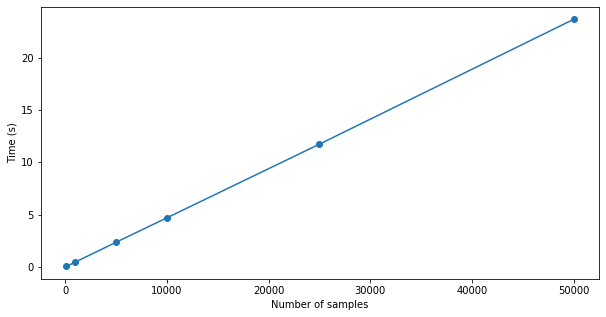

In [281]:
plt.plot(lengths, times, marker = 'o')
plt.xlabel("Number of samples")
plt.ylabel("Time (s)")

We can see that we don't get much in terms of approximating the mean & variance going further than 5000 data points.

p(s_1) = N(0, 1)
p(s_1 | y = 1) = N(0.47, 0.58)
<br>
p(s_2) = N(0, 1)
p(s_2 | y = 1) = N(-0.47, 0.58)
<br>
<br>
In the light of new data, i.e. that player 1 won, we are now more sure that player 1 has a positive skill level since the mean has increased and the variance has shrinked.
<br>
<br>
The same is true for player 2, but in reverse. Now that we know that player 2 lost, we are a little bit more sure that player 2 has a negative skill level

# Q5

In [451]:
import pandas as pd

In [452]:
series_df = pd.read_csv('SerieA.csv')
series_df.count()

yyyy-mm-dd    380
HH:MM         380
team1         380
team2         380
score1        380
score2        380
dtype: int64

In [453]:
series_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2
0,2018-08-18,18:00,Chievo,Juventus,2,3
1,2018-08-18,20:30,Lazio,Napoli,1,2
2,2018-08-19,18:00,Torino,Roma,0,1
3,2018-08-19,20:30,Sassuolo,Inter,1,0
4,2018-08-19,20:30,Parma,Udinese,2,2


In [454]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
yyyy-mm-dd    380 non-null object
HH:MM         380 non-null object
team1         380 non-null object
team2         380 non-null object
score1        380 non-null int64
score2        380 non-null int64
dtypes: int64(2), object(4)
memory usage: 17.9+ KB


In [455]:
no_ties_df = series_df.loc[series_df['score1'] != series_df['score2']]
no_ties_df.count()

yyyy-mm-dd    272
HH:MM         272
team1         272
team2         272
score1        272
score2        272
dtype: int64

In [456]:
no_ties_df['result'] = no_ties_df.apply(lambda row: 1 if row.score1 > row.score2 else -1, axis=1)

C:\Users\maxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [478]:
no_ties_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
1,2018-08-18,20:30,Lazio,Napoli,1,2,-1
2,2018-08-19,18:00,Torino,Roma,0,1,-1
3,2018-08-19,20:30,Sassuolo,Inter,1,0,1
5,2018-08-19,20:30,Empoli,Cagliari,2,0,1


In [479]:
teams_df = no_ties_df[['team1', 'team2']].values.ravel()
teams_df = pd.unique(teams_df)
teams_dict = {t : (0, 1) for t in teams_df}
teams_dict

{'Chievo': (0, 1),
 'Juventus': (0, 1),
 'Lazio': (0, 1),
 'Napoli': (0, 1),
 'Torino': (0, 1),
 'Roma': (0, 1),
 'Sassuolo': (0, 1),
 'Inter': (0, 1),
 'Empoli': (0, 1),
 'Cagliari': (0, 1),
 'Bologna': (0, 1),
 'Spal': (0, 1),
 'Atalanta': (0, 1),
 'Frosinone': (0, 1),
 'Milan': (0, 1),
 'Parma': (0, 1),
 'Udinese': (0, 1),
 'Sampdoria': (0, 1),
 'Genoa': (0, 1),
 'Fiorentina': (0, 1)}

In [480]:
def gibbs_sample_one_game(mu_1, var_1, mu_2, var_2, y, iterations):
    # TODO: handle burn in
    var_t = 5
    T = np.zeros(iterations)
    S1 = np.zeros(iterations)
    S2 = np.zeros(iterations)

    T[0] = 0 #TODO: what should we use here?
    S1[0] = mu_1
    S2[0] = mu_2
    m0 = np.array([[mu_1, mu_2]]).T
    S0 = np.matrix( [[1/var_1, 0], [0, 1/var_2]] )
    X = np.array([[1, -1]])

    Sn = s_n(S0, var_t, X)


    for i in range(1, iterations):
        # p(t_k+1 | s1_k, s2_k, y)
        mu_t = S1[i - 1] - S2[i - 1]
        if y == 1:
            T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
        else:
            T[i] = truncnorm.rvs(a=-np.inf, b=-mu_t/np.sqrt(var_t), loc=mu_t, scale=np.sqrt(var_t))

        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, var_t, X, T[i])
        S1[i] = np.random.normal(mn[0, 0],Sn[0, 0])
        S2[i] = np.random.normal(mn[1, 0],Sn[1, 1])
    
    
    return gauss_approx(S1, S2)

In [481]:
for i, row in no_ties_df.iterrows():
    team_1 = row['team1']
    team_2 = row['team2']
    y = row['result']
  #  print('input:')
 #   print(teams_dict[team_1][0], teams_dict[team_2][0])
#    print('-' * 10)
    print(team_1, teams_dict[team_1], team_2, teams_dict[team_2])
    
    new_mu, new_cov = gibbs_sample_one_game(teams_dict[team_1][0], 
                                            teams_dict[team_1][1],
                                            teams_dict[team_2][0], 
                                            teams_dict[team_2][1],
                                            y, 
                                            1000)
   # print('Output:')
  #  print(new_mu)
 #   print(new_cov)
#    print('-' * 10)
    teams_dict[team_1] = (new_mu[0], new_cov[0, 0])
    teams_dict[team_2] = (new_mu[1], new_cov[1, 1])
    

Chievo (0, 1) Juventus (0, 1)
Lazio (0, 1) Napoli (0, 1)
Torino (0, 1) Roma (0, 1)
Sassuolo (0, 1) Inter (0, 1)
Empoli (0, 1) Cagliari (0, 1)
Bologna (0, 1) Spal (0, 1)
Atalanta (0, 1) Frosinone (0, 1)
Juventus (2.4846153128729527, 3.030301992954727) Lazio (-2.086197054630649, 2.451144176342574)
Napoli (2.1003060087440653, 2.2944457198203208) Milan (0, 1)
Spal (2.3702458131004436, 2.657983094169751) Parma (0, 1)
Udinese (0, 1) Sampdoria (0, 1)
Genoa (0, 1) Empoli (2.04645423140281, 2.032536636296739)
Fiorentina (0, 1) Chievo (-2.4498123081887027, 3.0747644384039763)
Milan (-1.779502931782959, 4.136883476179597) Roma (2.0551252520230836, 1.9917737680467875)
Bologna (-2.378880805679545, 2.622814539468587) Inter (-2.097115259967103, 2.328237819914454)
Parma (-1.7800718174196573, 3.869619816999935) Juventus (2.841809707582363, 1.4077040502246532)
Fiorentina (1.6287047228341893, 4.334591539339146) Udinese (2.1239655294189226, 2.351710441763541)
Torino (-2.0834042418910865, 1.994660190235569

ValueError: Domain error in arguments.

In [423]:
new_mu, new_cov = gibbs_sample_one_game(-1.5880310229387928, 
                                            0.02516007298050627,
                                            3.759977582303271, 
                                            0.03240477411905207,
                                            -1, 
                                            1000)

nan nan
nan nan 1.0
nan nan
nan nan 1.0
nan nan
nan nan 1.0
nan nan
nan nan 1.0
nan nan
nan nan 1.0
nan nan
nan nan 1.0
nan nan
nan nan 1.0
nan nan
nan nan 1.0


In [424]:
teams_dict

{'Chievo': (-0.7766173174752152, 7.766280775041596e-17),
 'Juventus': (0.746103376723408, 4.941485118571935e-32),
 'Lazio': (-0.40808460206101593, 1.2338289934012323e-32),
 'Napoli': (0.4808007972461164, 1.2338289934012323e-32),
 'Torino': (0.0778163584969561, 1.0628336252959483e-05),
 'Roma': (-0.194058942515982, 1.3872085003933431e-22),
 'Sassuolo': (0.6548775759590986, 2.963851209260133e-19),
 'Inter': (-0.31503366683103656, 0.0),
 'Empoli': (-0.2353664949150267, 4.0974637320781275e-18),
 'Cagliari': (-0.21341440710253778, 5.1485629079265214e-06),
 'Bologna': (-0.7533072658900124, 7.271009427555612e-18),
 'Spal': (0.47544917906360606, 0.0),
 'Atalanta': (-0.2079149881752092, 8.721861392984623e-18),
 'Frosinone': (-0.8775521369294724, 1.377538616694622e-18),
 'Milan': (0.30125318880796714, 3.2672618800123246e-06),
 'Parma': (-0.30307736508919675, 0.0),
 'Udinese': (0.20822734134404258, 3.373472876145283e-20),
 'Sampdoria': (0.1186370890468261, 3.4119040379558774e-11),
 'Genoa': (0.30

In [425]:
no_ties_df[no_ties_df['team1'] == 'Chievo']

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
45,2018-09-23,15:00,Chievo,Udinese,0,2,-1
65,2018-09-30,15:00,Chievo,Torino,0,1,-1
84,2018-10-21,15:00,Chievo,Atalanta,1,5,-1
107,2018-11-04,15:00,Chievo,Sassuolo,0,2,-1
187,2018-12-29,15:00,Chievo,Frosinone,1,0,1
203,2019-01-27,12:30,Chievo,Fiorentina,3,4,-1
221,2019-02-08,20:30,Chievo,Roma,0,3,-1
261,2019-03-09,20:30,Chievo,Milan,1,2,-1
279,2019-03-29,20:30,Chievo,Cagliari,0,3,-1


In [426]:
no_ties_df[no_ties_df['team2'] == 'Chievo']

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
15,2018-08-26,20:30,Fiorentina,Chievo,6,1,1
54,2018-09-26,21:00,Genoa,Chievo,2,0,1
74,2018-10-07,15:00,Milan,Chievo,3,1,1
95,2018-10-28,15:00,Cagliari,Chievo,2,1,1
171,2018-12-26,15:00,Sampdoria,Chievo,2,0,1
199,2019-01-21,20:30,Juventus,Chievo,3,0,1
234,2019-02-17,15:00,Udinese,Chievo,1,0,1
253,2019-03-03,12:30,Torino,Chievo,3,0,1
297,2019-04-04,19:00,Sassuolo,Chievo,4,0,1
308,2019-04-08,20:30,Bologna,Chievo,3,0,1
